In [1]:
from skimage.io import imread
from skimage.exposure import histogram
from skimage.color import rgb2gray
import glob as g
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, entropy
%matplotlib inline

labels, labels_name = [], ['class1', 'class2']

gato = g.glob('image_resize/filter_roberts/class1_roberts/*.png')
cachorro = g.glob('image_resize/filter_roberts/class2_roberts/*.png')

images = []

for path in gato:
    im = imread(path, as_grey=True)
    images.append(im)
    labels.append(0)

for path in cachorro:
    im = imread(path, as_grey=True)
    images.append(im)
    labels.append(1)
    
# plt.figure(figsize=(5, 10))
# plt.imshow(images[70], cmap='gray')
# plt.title('Image in grayscale')
# plt.show()
# plt.figure(figsize=(5, 10))
# plt.imshow(images[69], cmap='gray')
# plt.title('Image in grayscale')
# plt.show()

/home/victor/anaconda3/envs/computer_vision/lib/python3.6/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


In [2]:
dados = []

for i in images:
    features = []
    histo = histogram(i, nbins=256)[0] # Calcula o histograma das imagens
    features.append(np.mean(histo))
    features.append(np.var(histo))
    features.append(skew(histo))
    features.append(kurtosis(histo))
    features.append(entropy(histo))
    features.append(np.power(histo, 2).sum())
    
    dados.append(features)  #Array de filtros

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(dados, labels, test_size=0.2)

# print('data train: {}'.format(len(train_data)))
# print('data test: {}'.format(len(test_data)))
# print('train labels: {}'.format(train_label))
# print('test labels: {}'.format(test_label))
# print('labels name: {}'.format(labels_name))

In [4]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(train_data, train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

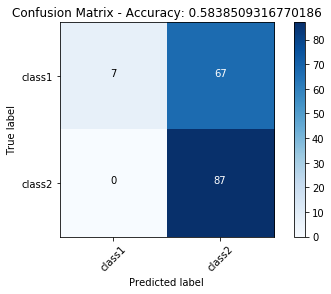

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

prediction = classifier.predict(test_data)
accuracy = accuracy_score(test_label, prediction)
matrix = confusion_matrix(test_label, prediction)

plt.figure()
plot_confusion_matrix(matrix, classes=[labels_name[0], labels_name[1]], 
                      title='Confusion Matrix - Accuracy: {}'.format(accuracy))

plt.show()